<a href="https://colab.research.google.com/github/Vicky-E/Vicky-E/blob/main/SAQC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


Data Processing

In [2]:
data = pd.read_csv("/content/Tds_2.csv")

In [3]:
data.shape
data.head()

,tanggal,co,o3,no2,categori
0,1/1/2010,73.0,27.0,14.0,SEDANG
1,1/2/2010,16.0,33.0,9.0,BAIK
2,1/3/2010,19.0,20.0,9.0,BAIK
3,1/4/2010,16.0,15.0,6.0,BAIK
4,1/5/2010,17.0,15.0,8.0,BAIK


In [ ]:
data.columns

Index(['tanggal', 'co', 'o3', 'no2', 'categori'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   co        4233 non-null   float64
 2   o3        4180 non-null   float64
 3   no2       4190 non-null   float64
 4   categori  4383 non-null   object 
dtypes: float64(3), object(2)
memory usage: 171.3+ KB


In [5]:
data.isnull().sum()

,0
tanggal,0
co,150
o3,203
no2,193
categori,0


In [6]:
data2 = data.dropna()
data2.isnull().sum()

,0
tanggal,0
co,0
o3,0
no2,0
categori,0


In [ ]:
data2.shape

(4083, 5)

# Data Representation

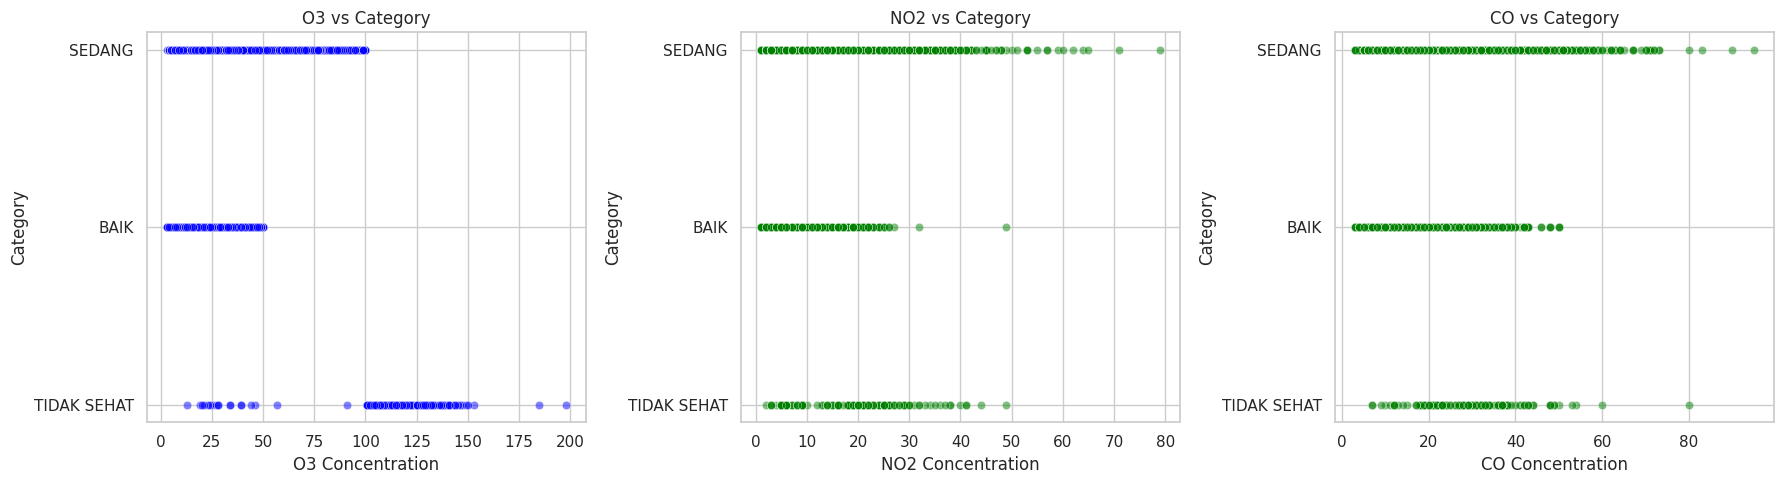

In [7]:
sns.set(style = "whitegrid")
plt.figure(figsize =(18, 5))
#O3 vs Category
plt.subplot(1, 3, 1)
sns.scatterplot(x=data2['o3'], y=data2['categori'], color='blue', alpha=0.5)
plt.title('O3 vs Category')
plt.xlabel('O3 Concentration')
plt.ylabel('Category')

# NO2 vs Category
plt.subplot(1, 3, 2)
sns.scatterplot(x=data2['no2'], y=data2['categori'], color='green', alpha=0.5)
plt.title('NO2 vs Category')
plt.xlabel('NO2 Concentration')
plt.ylabel('Category')

# CO vs Category
plt.subplot(1, 3, 3)
sns.scatterplot(x=data2['co'], y=data2['categori'], color='green', alpha=0.5)
plt.title('CO vs Category')
plt.xlabel('CO Concentration')
plt.ylabel('Category')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




In [8]:
data2 = data2.drop(["tanggal"], axis =1)

In [9]:
label_encoder = LabelEncoder()
data2['categori'] = label_encoder.fit_transform(data2['categori'])

In [10]:
data2.head()

,co,o3,no2,categori
0,73.0,27.0,14.0,1
1,16.0,33.0,9.0,0
2,19.0,20.0,9.0,0
3,16.0,15.0,6.0,0
4,17.0,15.0,8.0,0


In [ ]:
data.head()

,tanggal,co,o3,no2,categori
0,1/1/2010,73.0,27.0,14.0,SEDANG
1,1/2/2010,16.0,33.0,9.0,BAIK
2,1/3/2010,19.0,20.0,9.0,BAIK
3,1/4/2010,16.0,15.0,6.0,BAIK
4,1/5/2010,17.0,15.0,8.0,BAIK


In [11]:
corr = data2.corr()

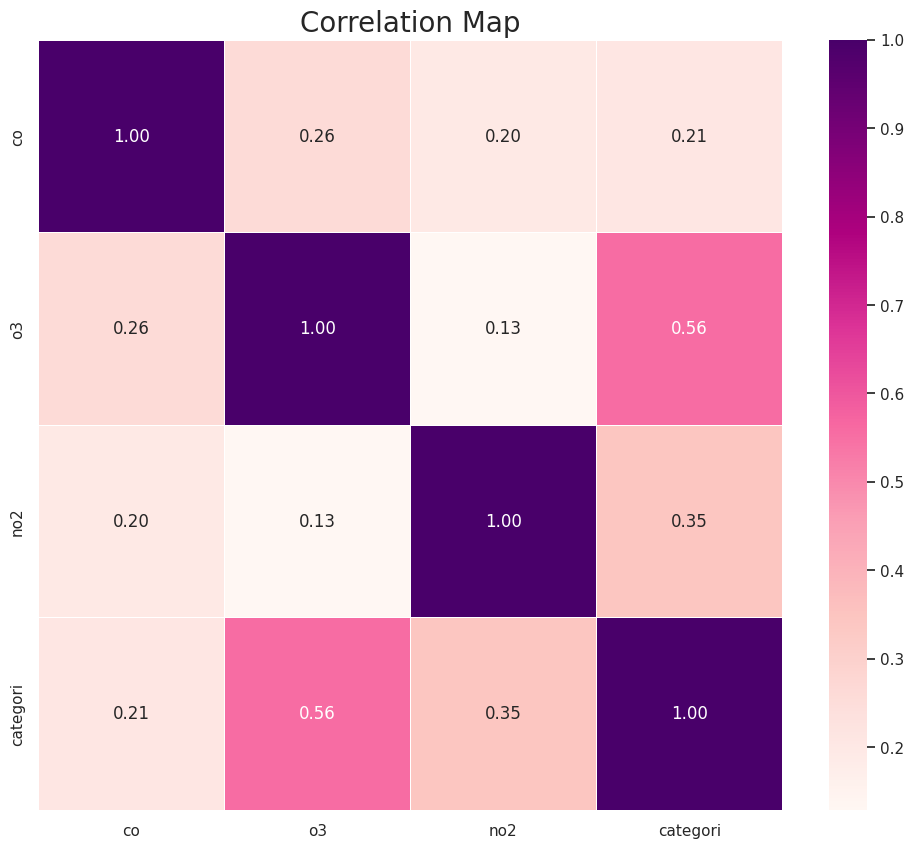

In [12]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data2.corr(), annot=True, linewidth=".5", cmap="RdPu", fmt=".2f", ax = ax)
plt.title("Correlation Map",fontsize=20)
plt.show()

In [13]:
X= data2.drop(["categori"], axis=1)
y=  data2["categori"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45, test_size=0.2)

# Model Training

## Random Forest Model

In [36]:
rfc = RandomForestClassifier(n_estimators= 100, random_state= 42)
rfc.fit(X_train.values,y_train.values)
y_pre = rfc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [37]:
accuracy = accuracy_score(y_test, y_pre)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}")
print(classification_report(y_test, y_pre))

Accuracy: 82.50
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       204
           1       0.87      0.89      0.88       585
           2       0.96      0.86      0.91        28

    accuracy                           0.82       817
   macro avg       0.83      0.80      0.81       817
weighted avg       0.82      0.82      0.82       817



## Logistic Regression

In [17]:
lr = LogisticRegression(random_state = 45)
lr.fit(X_train.values,y_train.values)
lr_y_pre = lr.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
lr_accuracy = accuracy_score(y_test, lr_y_pre)
lr_accuracy_percentage = lr_accuracy * 100
print(f"Accuracy: {lr_accuracy_percentage:.2f}")

Accuracy: 76.01


## Support Vector Machine

In [40]:
svc = SVC()
svc.fit(X_train.values,y_train.values)
svc_y_pre = svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [41]:
svc_accuracy = accuracy_score(y_test, svc_y_pre)
svc_accuracy_percentage = svc_accuracy * 100
print(f"Accuracy: {svc_accuracy_percentage:.2f}")


Accuracy: 80.42


## Naive Bayes

In [21]:
nb = GaussianNB()
nb.fit(X_train.values,y_train.values)
nb_y_pre= nb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [22]:
nb_accuracy = accuracy_score(y_test, nb_y_pre)
nb_accuracy_percentage = nb_accuracy * 100
print(f"Accuracy: {nb_accuracy_percentage:.2f}")


Accuracy: 78.70


## Decision Tree

In [24]:
dt = DecisionTreeClassifier(max_depth = 10, random_state = 101, max_features = None, min_samples_leaf = 15)
dt.fit(X_train.values, y_train.values)
dt_y_pre = dt.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [25]:
dt_accuracy = accuracy_score(y_test, dt_y_pre)
dt_accuracy_percentage = dt_accuracy * 100
print(f"Accuracy: {dt_accuracy_percentage:.2f}")

Accuracy: 81.88


In [42]:
data2

,co,o3,no2,categori
0,73.0,27.0,14.0,1
1,16.0,33.0,9.0,0
2,19.0,20.0,9.0,0
3,16.0,15.0,6.0,0
4,17.0,15.0,8.0,0
...,...,...,...,...
4378,15.0,20.0,15.0,1
4379,15.0,18.0,13.0,1
4380,10.0,24.0,11.0,1
4381,16.0,23.0,14.0,1
